In [1]:
import numpy as np
import scipy.linalg
from tqdm import tqdm
import matplotlib.pyplot as plt
from itertools import product

In [2]:
# covariance matrix of fBm with Hurst index H

#for i in range(1, n_increments+1):
    #for j in range(1, n_increments+1):
        #cov[i-1,j-1] = (pow(j, 2*H) + pow(i, 2*H) - pow(abs(i-j), 2*H))/2

def fBm_cov(n_increments, H):
    idx = np.linspace(1,n_increments,n_increments)
    t, s = np.zeros(pow(n_increments,2)), np.zeros(pow(n_increments,2))

    k = 0
    for i in product(idx, idx):
        t[k], s[k] = i
        k = k + 1
    
    cov = (pow(s, 2*H) + pow(t, 2*H) - pow(abs(t-s), 2*H)) * 0.5

    return np.reshape(cov, (n_increments,n_increments))

In [3]:
def simulate_fBm(n_paths: int, n_increments: int, H: float, cholesky = True) -> np.ndarray:

    if H < 0 or H > 1:
        print("0 <= H <= 1 not satisfied")

    else:
        control = False
        #fBm_paths = np.zeros((n_paths,n_increments))
        fBm_paths = np.zeros((n_increments,n_paths))
        cov = np.zeros((n_increments,n_increments))
        cov = fBm_cov(n_increments, H)

        if cholesky: # fast
            #sigma = np.transpose(scipy.linalg.cholesky(cov))
            #control = np.all(np.matmul(sigma,np.transpose(sigma)) - cov < 1e-06)
            sigma = scipy.linalg.cholesky(cov, lower=True)
            control = np.all(np.matmul(sigma,sigma.T) - cov < 1e-06)
        else: # quite slow   
            lambd, P = np.linalg.eig(cov)
            lambd = np.diag(np.sqrt(lambd))
            sigma = np.matmul(np.matmul(P, lambd), np.linalg.inv(P))
            control = np.all(np.matmul(sigma, sigma) - cov < 1e-06)

        #for k in tqdm(range(n_paths)):
            # v
        #    normal = np.random.normal(size=n_increments)

            # path = sigma.v
        #    fBm_paths[k, :] = sigma.dot(normal)

        normal = np.random.randn(n_increments,n_paths)
        fBm_paths = np.matmul(sigma,normal)

        if control:
            print("Good news, everyone! I think I perfected a scheme that will simulate all paths!")
        else: 
            print("Bad news, everyone! I don't think the simulation is going to make it.")
        return fBm_paths.T

In [9]:
paths = simulate_fBm(3,1000,0.5,True)

Good news, everyone! I think I perfected a scheme that will simulate all paths!


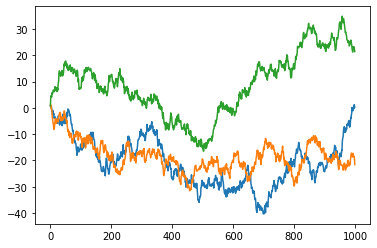

In [10]:
for i in range(paths.shape[0]):
    plt.plot(paths[i])
plt.show()

In [7]:
cov = fBm_cov(10,0.12); cov

array([[1.        , 0.59049633, 0.56035097, 0.54652454, 0.53836552,
        0.53290853, 0.52896952, 0.52597561, 0.52361339, 0.52169601],
       [0.59049633, 1.18099266, 0.74134363, 0.69737183, 0.67538639,
        0.66177038, 0.65237438, 0.64544147, 0.64008533, 0.63580573],
       [0.56035097, 0.74134363, 1.30169459, 0.84821913, 0.79608832,
        0.76864588, 0.75109087, 0.73870096, 0.72940582, 0.72213231],
       [0.54652454, 0.69737183, 0.84821913, 1.39474367, 0.93310919,
        0.87552138, 0.84413994, 0.82359102, 0.80883889, 0.79762637],
       [0.53836552, 0.67538639, 0.79608832, 0.93310919, 1.47147471,
        1.00438323, 0.94285643, 0.90848107, 0.88556993, 0.86890041],
       [0.53290853, 0.66177038, 0.76864588, 0.87552138, 1.00438323,
        1.53729176, 1.06626129, 1.00174057, 0.96500299, 0.94017446],
       [0.52896952, 0.65237438, 0.75109087, 0.84413994, 0.94285643,
        1.06626129, 1.59523081, 1.12120642, 1.05432348, 1.01566852],
       [0.52597561, 0.64544147, 0.7387009

In [8]:
sigma = np.transpose(scipy.linalg.cholesky(cov)); sigma

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.59049633, 0.91230847, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.56035097, 0.4499119 , 0.88616063, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.54652454, 0.41066274, 0.40310019, 0.87459759, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.53836552, 0.39184501, 0.35898564, 0.38103911, 0.86835089,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.53290853, 0.38045229, 0.33725269, 0.33397027, 0.36860758,
        0.86452834, 0.        , 0.        , 0.        , 0.        ],
       [0.52896952, 0.37270269, 0.32386782, 0.31035854, 0.31958641,
        0.36076959, 0.86198132, 0.        , 0.        , 0.        ],
       [0.52597561, 0.3670412 , 0.3146538

In [10]:
np.all(np.matmul(sigma, np.transpose(sigma))-cov < 1e06)

True